# PREDICTION OF CAR SALES PROJECT 

1.IMPORTING THE LIBRARIES:

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import plot_tree

2.LOADING THE DATASET:

In [2]:
data = pd.read_csv("car details v4.csv")
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


3.FINDING THE CORRELATION BETWEEN VARIABLES:
This helps us to find the variables which are highly correlated and which are not correlated.
Correlation plot gives the mapping of relationships between the variables.

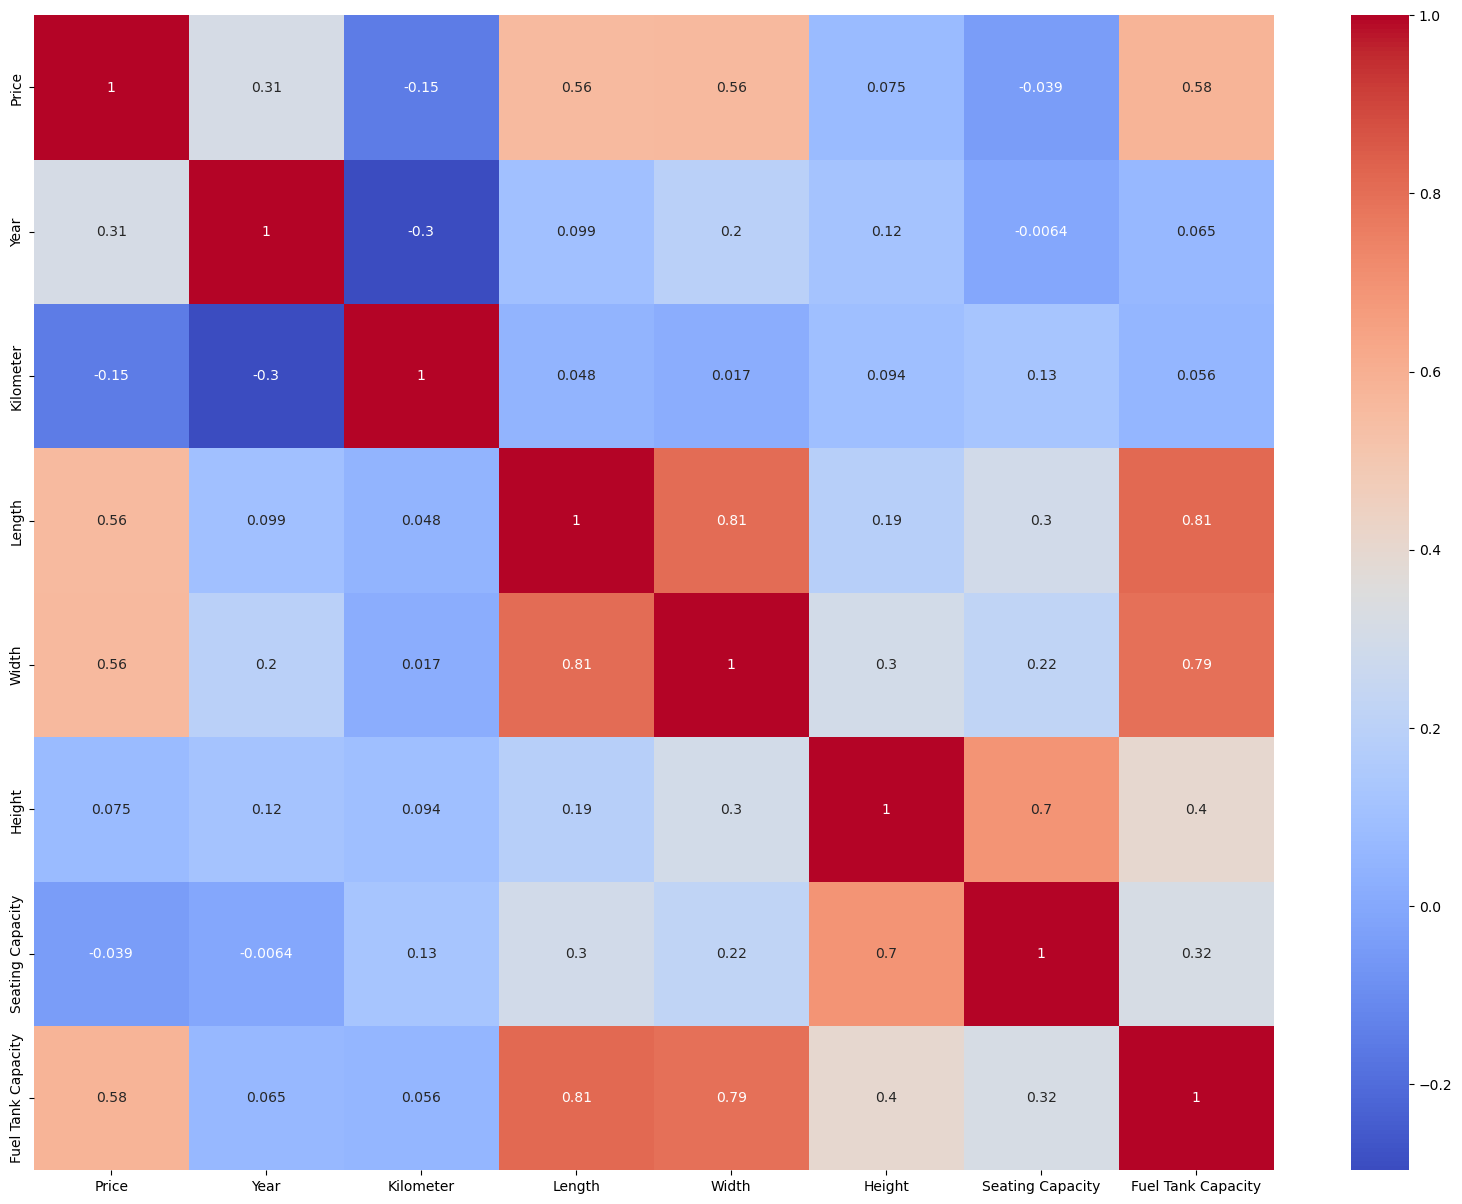

In [3]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

From the above correlation plot,it is identified that the price of the car is dependent with length, width and fuel tank capacity.

In [4]:
data = data[["Model", "Kilometer", "Fuel Type", 
             "Engine", "Height", "Width", 
             "Length", "Max Power", "Seating Capacity", 
             "Fuel Tank Capacity", "Price"]]

4.RESETTING THE INDEX:

In [5]:
X=data.loc[:,["Model", "Kilometer", "Fuel Type", 
             "Engine", "Height", "Width", 
             "Length", "Max Power", "Seating Capacity", 
             "Fuel Tank Capacity", "Price"]]

5.SUBSETTING ALL CATEGORICAL VALUES:

In [6]:
data_categorical = X.select_dtypes(include=['object'])

6.CONVERTING TO DUMMIES:

In [7]:
data_dummies = pd.get_dummies(data_categorical, drop_first=True)

7.DROP CATEGORICAL VALUES AND CONCAT DUMMY VARIABLES:

In [8]:
X = X.drop(list(data_categorical.columns), axis=1)

8.SCALING THE FEATURES OF THE TRAINING DATASET:

In [9]:
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Kilometer', 'Height', 'Width', 'Length', 'Seating Capacity',
       'Fuel Tank Capacity', 'Price'],
      dtype='object')

9. TARGET VARIABLE - PRICE:

In [11]:
Y = data["Price"]

10.SPLITTING THE DATASET:

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

11.FILL THE NULL VALUES:

In [13]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

12.DECISION TREE REGREESSOR:

In [14]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

13.PREDICTING THE TEST DATA:

In [15]:
predictions = model.predict(X_test)

14.MODEL SCORE:

In [16]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0

15.PREDICTION ON NEW DATA:

In [34]:
new_data = pd.DataFrame({
     "Kilometer":[2440000] ,
     "Height":[1706], "Width":[1821], 
     "Length":[4598] , 
     "Seating Capacity":[5], "Fuel Tank Capacity":[51], "Price":[3800000]
})


# Predict using the trained model
prediction = model.predict(new_data)

# 5. Evaluate the prediction
print("Predicted output:", prediction)

Predicted output: [27500000.]


16.PLOTTING THE DECISION TREE:

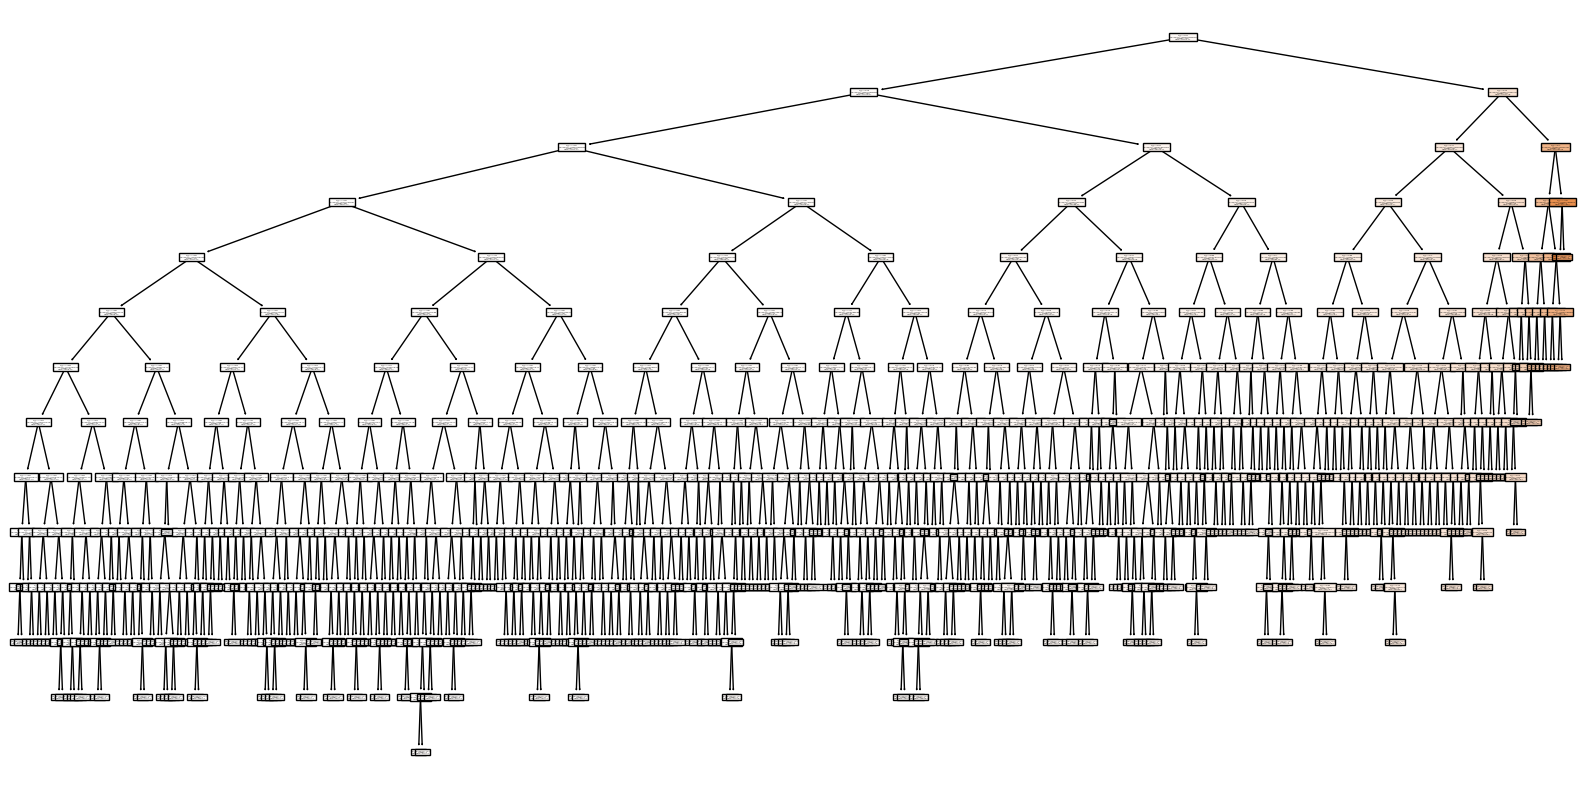

In [37]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()